<a href="https://colab.research.google.com/github/rocpac/xat/blob/main/ML_1_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SUP ML 1 - PREPROCESSING

# Librerias

In [ ]:
#WARNING! VER QUE SR TRATE EN PARALELO EL PREDICT Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings("ignore")

# Importar data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df= pd.read_csv("/content/telecom_churn_TRAINTEST.csv")
df_predecir = pd.read_csv("/content/telecom_churn_PREDICT.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 100 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev               89866 non-null  float64
 1   mou               89866 non-null  float64
 2   totmrc            89866 non-null  float64
 3   da                89866 non-null  float64
 4   ovrmou            89866 non-null  float64
 5   ovrrev            89866 non-null  float64
 6   vceovr            89866 non-null  float64
 7   datovr            89866 non-null  float64
 8   roam              89866 non-null  float64
 9   change_mou        89405 non-null  float64
 10  change_rev        89405 non-null  float64
 11  drop_vce          90000 non-null  float64
 12  drop_dat          90000 non-null  float64
 13  blck_vce          90000 non-null  float64
 14  blck_dat          90000 non-null  float64
 15  unan_vce          90000 non-null  float64
 16  unan_dat          90000 non-null  float

In [ ]:
df_predecir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 99 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev               9777 non-null   float64
 1   mou               9777 non-null   float64
 2   totmrc            9777 non-null   float64
 3   da                9777 non-null   float64
 4   ovrmou            9777 non-null   float64
 5   ovrrev            9777 non-null   float64
 6   vceovr            9777 non-null   float64
 7   datovr            9777 non-null   float64
 8   roam              9777 non-null   float64
 9   change_mou        9704 non-null   float64
 10  change_rev        9704 non-null   float64
 11  drop_vce          10000 non-null  float64
 12  drop_dat          10000 non-null  float64
 13  blck_vce          10000 non-null  float64
 14  blck_dat          10000 non-null  float64
 15  unan_vce          10000 non-null  float64
 16  unan_dat          10000 non-null  float64

In [ ]:
#Vemos que los 2 datasets tienen distinto count de columnas
#Vamos a verificar por que es esto

# Verificar columnas en ambos DataFrames
df_columns = set(df.columns)
df_predecir_columns = set(df_predecir.columns)

# Columnas que están en df pero no en df_predict
extra_in_df = df_columns - df_predecir_columns

# Columnas que están en df_predict pero no en df
extra_in_df_predecir = df_predecir_columns - df_columns

# Imprimir resultados
if not extra_in_df and not extra_in_df_predecir:
    print("Ambos DataFrames tienen las mismas columnas.")
else:
    print("Columnas adicionales en df:", extra_in_df)
    print("Columnas adicionales en df_predict:", extra_in_df_predecir)

Columnas adicionales en df: {'churn'}
Columnas adicionales en df_predict: set()


In [ ]:
#como vemos, solo se trata de la variable target ("churn"), que esta
#en el dataset de traninig, pero no en el de predict
#asi que seguimos adelante

# EDA: Analisis Exploratorio

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 100 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev               89866 non-null  float64
 1   mou               89866 non-null  float64
 2   totmrc            89866 non-null  float64
 3   da                89866 non-null  float64
 4   ovrmou            89866 non-null  float64
 5   ovrrev            89866 non-null  float64
 6   vceovr            89866 non-null  float64
 7   datovr            89866 non-null  float64
 8   roam              89866 non-null  float64
 9   change_mou        89405 non-null  float64
 10  change_rev        89405 non-null  float64
 11  drop_vce          90000 non-null  float64
 12  drop_dat          90000 non-null  float64
 13  blck_vce          90000 non-null  float64
 14  blck_dat          90000 non-null  float64
 15  unan_vce          90000 non-null  float64
 16  unan_dat          90000 non-null  float

## Distribución del target

In [ ]:
target = 'churn'

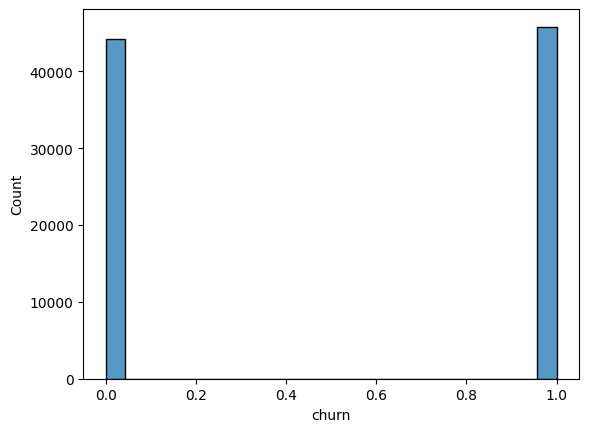

In [ ]:
sns.histplot(data=df, x=target)
plt.show()

## Analisis Univariable

* Distribucion de cada variable

In [ ]:
"""def graficar_distribuciones(df):
    # Columnas numéricas
    columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns

    # Columnas categóricas
    columnas_categoricas = df.select_dtypes(include=['object', 'category', 'bool']).columns

    # Graficar distribuciones numéricas
    for col in columnas_numericas:
        plt.figure(figsize=(8, 5))
        sns.histplot(df[col].dropna(), kde=True, bins=30, color='blue')
        plt.title(f'Distribución de {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.show()

    # Graficar distribuciones categóricas
    for col in columnas_categoricas:
        plt.figure(figsize=(8, 5))
        df[col].value_counts().plot(kind='bar', color='orange')
        plt.title(f'Distribución de {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.show()

# Llamar la función
graficar_distribuciones(df)"""

"def graficar_distribuciones(df):\n    # Columnas numéricas\n    columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns\n\n    # Columnas categóricas\n    columnas_categoricas = df.select_dtypes(include=['object', 'category', 'bool']).columns\n\n    # Graficar distribuciones numéricas\n    for col in columnas_numericas:\n        plt.figure(figsize=(8, 5))\n        sns.histplot(df[col].dropna(), kde=True, bins=30, color='blue')\n        plt.title(f'Distribución de {col}')\n        plt.xlabel(col)\n        plt.ylabel('Frecuencia')\n        plt.show()\n\n    # Graficar distribuciones categóricas\n    for col in columnas_categoricas:\n        plt.figure(figsize=(8, 5))\n        df[col].value_counts().plot(kind='bar', color='orange')\n        plt.title(f'Distribución de {col}')\n        plt.xlabel(col)\n        plt.ylabel('Frecuencia')\n        plt.show()\n\n# Llamar la función\ngraficar_distribuciones(df)"

## Analisis Variable-Target

* Relacion target-variable

In [ ]:
"""numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Configurar número de columnas por fila
n_cols = 2
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # Calcular número de filas

# Crear una figura con subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 3))
axes = axes.flatten()  # Aplanar para iterar fácilmente

# Crear scatterplots
for i, col in enumerate(numeric_cols):
    ax = axes[i]
    ax.scatter(df[col], df[target], alpha=0.5)
    ax.set_title(f'{col} vs {target}', fontsize=10)
    ax.set_xlabel(col, fontsize=8)
    ax.set_ylabel(target, fontsize=8)
    ax.grid(True)

# Ocultar gráficos sobrantes si hay espacios vacíos
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Ajustar espacios entre subplots
plt.tight_layout()
plt.show()"""

"numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns\n\n# Configurar número de columnas por fila\nn_cols = 2\nn_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # Calcular número de filas\n\n# Crear una figura con subplots\nfig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 3))\naxes = axes.flatten()  # Aplanar para iterar fácilmente\n\n# Crear scatterplots\nfor i, col in enumerate(numeric_cols):\n    ax = axes[i]\n    ax.scatter(df[col], df[target], alpha=0.5)\n    ax.set_title(f'{col} vs {target}', fontsize=10)\n    ax.set_xlabel(col, fontsize=8)\n    ax.set_ylabel(target, fontsize=8)\n    ax.grid(True)\n\n# Ocultar gráficos sobrantes si hay espacios vacíos\nfor j in range(i + 1, len(axes)):\n    axes[j].axis('off')\n\n# Ajustar espacios entre subplots\nplt.tight_layout()\nplt.show()"

In [ ]:
# Vemos que hay algunos outliers.
# Despues de probar varias tecnicas para quitarlos, vamos a coger 3 variables al azar
# Y de esas 3, vemos cuantos desvios estandares por encima de la media estan los outliers
# Solo miramos por encima de la media porque parece que no hay outliers por debajo de la media
# Vemos que 28 podría ser un umbral que tenga sentido. Este numero nos los guardamos para usarlo en el apartado "outliers"

# Rev "adjrev"

valor = 25000  # Valor sobre el cual queremos calcular cuántas desviaciones estándar está por encima

# Calcular la media y desviación estándar de la columna
media = df['adjrev'].mean()
desviacion_estandar = df['adjrev'].std()

# Calcular cuántas desviaciones estándar por encima de la media está el valor
num_desviaciones = (valor - media) / desviacion_estandar

# Imprimir el resultado
print(f'El valor {valor} está a {num_desviaciones:.2f} desviaciones estándar por encima de la media.')

El valor 25000 está a 28.18 desviaciones estándar por encima de la media.


In [ ]:
# Variable "Rev"
valor = 3500  # Valor sobre el cual queremos calcular cuántas desviaciones estándar está por encima

# Calcular la media y desviación estándar de la columna
media = df['rev'].mean()
desviacion_estandar = df['rev'].std()

# Calcular cuántas desviaciones estándar por encima de la media está el valor
num_desviaciones = (valor - media) / desviacion_estandar

# Imprimir el resultado
print(f'El valor {valor} está a {num_desviaciones:.2f} desviaciones estándar por encima de la media.')

El valor 3500 está a 74.68 desviaciones estándar por encima de la media.


In [ ]:
# Rev "uniqsubs"

valor = 175  # Valor sobre el cual queremos calcular cuántas desviaciones estándar está por encima

# Calcular la media y desviación estándar de la columna
media = df['uniqsubs'].mean()
desviacion_estandar = df['uniqsubs'].std()

# Calcular cuántas desviaciones estándar por encima de la media está el valor
num_desviaciones = (valor - media) / desviacion_estandar

# Imprimir el resultado
print(f'El valor {valor} está a {num_desviaciones:.2f} desviaciones estándar por encima de la media.')

El valor 175 está a 158.35 desviaciones estándar por encima de la media.


In [ ]:
# Rev "mou_opkd"
valor = 2500  # Valor sobre el cual queremos calcular cuántas desviaciones estándar está por encima

# Calcular la media y desviación estándar de la columna
media = df['mou_opkd'].mean()
desviacion_estandar = df['mou_opkd'].std()

# Calcular cuántas desviaciones estándar por encima de la media está el valor
num_desviaciones = (valor - media) / desviacion_estandar

# Imprimir el resultado
print(f'El valor {valor} está a {num_desviaciones:.2f} desviaciones estándar por encima de la media.')

El valor 2500 está a 147.10 desviaciones estándar por encima de la media.


# Data Cleaning

## Eliminar filas sin target informado.

In [ ]:
df[df[target].isnull()]

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,churn,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID


## Eliminar filas duplicadas (si tenemos ID, solo puede haber 1 registro por ID)

In [ ]:
print(df.duplicated().sum())

0


## Fechas y textos: convertir a variables numericas (hour, day, month, year...) o categoricas (weekday_name...)



In [ ]:
#Aparentemente, no hay variables de fecha en el dataset

## Corregir data types incorrectos

In [ ]:
#Vamos a intentar ver si alguna de las variables categoricas deberían ser, en realidad, de otro tipo, en base a los valores que tienen:
# No es el caso, asi que seguimos adelante

for col in df:
  if (df[col].dtype.kind == "O"):
    print(f'{df[col].value_counts(normalize=True) * 100}\n')

new_cell
U    65.346667
Y    20.126667
N    14.526667
Name: proportion, dtype: float64

crclscod
AA    37.946667
A     17.335556
BA    12.522222
CA     8.210000
EA     6.134444
B      4.158889
DA     3.556667
ZA     3.530000
C      1.575556
A2     0.856667
U      0.476667
E      0.366667
E4     0.338889
GA     0.294444
D      0.271111
G      0.262222
I      0.256667
JF     0.213333
Z      0.207778
J      0.187778
M      0.170000
C2     0.168889
D4     0.118889
Z4     0.104444
K      0.103333
W      0.093333
V1     0.077778
U1     0.062222
EM     0.051111
B2     0.046667
Y      0.042222
EC     0.035556
O      0.026667
CY     0.023333
E2     0.021111
CC     0.021111
D5     0.017778
C5     0.015556
IF     0.015556
ZY     0.013333
Z1     0.012222
Z5     0.008889
H      0.008889
TP     0.005556
D2     0.005556
GY     0.005556
L      0.004444
EF     0.004444
Z2     0.004444
A3     0.003333
P1     0.002222
S      0.001111
V      0.001111
ZF     0.001111
Name: proportion, dtype: float64

asl_f

In [ ]:
#Las variables "forgntvl", "truck", "rv" son booleanas
# (se ve claro mas adelante, cuando imputamos nulos), con lo cual las convertiremos:
for var in ['forgntvl', 'truck', 'rv']:
  df[var] = df[var].astype('boolean')
  df_predecir[var] = df_predecir[var].astype('boolean')

In [ ]:
#Eliminamos esta columna porque no aporta información:
del df['infobase']
del df_predecir['infobase']

## Corregir valores incorrectos

In [ ]:
#Vamos a ver si, de las variables numericas, todos los valores tienen sentido (ej: que no haya valores negativos si no tiene sentido)
df.describe()

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,churn,months,uniqsubs,actvsubs,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,hnd_price,phones,models,lor,adults,income,numbcars,eqpdays,Customer_ID
count,89866.000000,89866.000000,89866.000000,89866.000000,89866.000000,89866.000000,89866.000000,89866.000000,89866.000000,89405.000000,89405.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,88593.000000,88593.000000,88593.000000,89296.000000,89999.000000,89999.000000,63498.000000,69967.000000,67804.000000,46432.000000,89999.000000,9.000000e+04
mean,58.312895,504.277946,45.880669,0.877813,40.798976,13.289932,13.046046,0.240786,1.308197,-13.786987,-1.074666,5.769639,0.037837,3.999448,0.019737,26.843561,0.027811,141.375341,0.805435,53.713298,0.047781,106.483091,0.720050,1.648754,4.344852,3.444618,28.909037,0.269522,221.363949,1.689888,109.071366,24.268663,27.785579,7.712004,17.676245,86.999369,0.334957,171.309285,0.654335,64.103954,0.385096,159.080481,1.035109,9.826661,142.180776,107.203141,0.010415,1.732817,0.508889,19.263856,1.555067,1.366522,2970.669433,7874.976570,1065.717715,994.546384,7776.807032,2931.320344,57.288343,472.052308,170.568866,510.539844,178.227000,58.802889,501.598490,176.320082,58.266691,99.709575,1.802987,1.556184,6.180856,2.538197,5.809274,1.568896,402.419438,1.045000e+06
std,46.084103,516.170057,23.370435,2.173665,96.970619,30.123282,29.719581,3.012631,15.374215,271.624916,50.565668,8.673272,0.885448,10.603489,0.699317,37.315217,0.501246,155.486573,8.455179,85.537833,2.176283,116.845898,7.679230,5.148484,12.141729,10.049161,54.960177,1.003104,257.220079,21.905864,160.081469,33.913196,47.948938,15.908932,40.382222,102.308064,3.890521,205.794020,7.335297,89.736523,4.393926,228.966797,16.988064,15.081650,156.468555,117.776670,0.465963,5.260407,0.499924,9.149764,1.095305,0.661085,3887.921200,8869.646079,865.305299,851.715318,8802.189472,3855.692056,35.430616,425.257319,165.134394,524.737209,191.398108,46.476204,489.911616,181.593174,40.483529,60.788920,1.319121,0.900798,4.741242,1.452650,2.176928,0.628308,252.821660,2.598091e+04
min,-5.862500,0.000000,-26.915000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.740000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,0.000000,0.000000,23.750000,9.320000,0.000000,0.000000,2.910000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-2.000000,9.989998,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,-5.000000,1.000001e+06
25%,33.027500,148.500000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-85.750000,-7.212500,0.666667,0.000000,0.000000,0.0000

In [ ]:
df_predecir.describe()

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,months,uniqsubs,actvsubs,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,hnd_price,phones,models,lor,adults,income,numbcars,eqpdays,Customer_ID
count,9777.000000,9777.000000,9777.000000,9777.000000,9777.000000,9777.000000,9777.000000,9777.000000,9777.000000,9704.000000,9704.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,8568.000000,8568.000000,8568.000000,9857.000000,10000.00000,10000.000000,6312.000000,7014.000000,6760.00000,4202.000000,10000.000000,1.000000e+04
mean,62.461781,598.876027,48.922510,0.990076,43.584032,16.037868,15.583912,0.450038,1.086100,-15.286609,-0.527241,7.624100,0.064667,4.234133,0.080133,36.257000,0.047800,176.438700,1.456567,67.431833,0.045867,130.577533,1.263967,3.069600,7.565133,5.831717,37.484167,0.421500,285.359657,3.231364,134.903334,29.115233,34.608442,9.535567,22.844159,101.808533,0.567000,199.024314,1.189307,83.099400,0.696967,221.082699,2.042054,12.003033,177.895267,131.841500,0.023267,2.233933,14.965200,1.485800,1.29090,2035.394400,5608.849200,727.790452,650.197828,5471.883700,1981.786100,63.543227,588.794152,200.425271,601.553500,199.330200,62.707300,592.727591,199.511204,62.994631,121.499577,1.64430,1.452600,6.140843,2.451811,5.52071,1.552832,297.549200,1.095000e+06
std,47.998705,594.887840,25.672879,2.211176,100.208979,33.675211,32.902230,4.020511,5.752155,314.247193,48.457858,11.034259,0.798077,11.270139,4.219658,45.853533,0.456317,178.321647,13.264834,96.927743,1.622859,131.205445,11.399759,6.494457,17.104817,14.033230,62.631408,1.688303,316.161961,36.219368,182.900381,38.364826,56.922499,18.055273,49.568753,108.754511,5.387241,222.342059,14.926829,104.144780,6.528905,296.623589,23.644297,18.053678,180.087903,132.820402,1.021321,6.113823,12.738313,0.871937,0.59926,2622.322296,6199.930036,658.029605,650.711233,6052.855441,2550.683585,41.753937,531.845920,188.222629,601.740077,203.314102,48.485112,554.990296,192.780061,43.268317,59.444070,1.25783,0.870993,4.674948,1.452279,2.21680,0.592898,269.575481,2.886896e+03
min,-6.167500,0.000000,-6.167500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3041.250000,-458.972500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.00000,0.000000,0.000000,3.650000,2.400000,0.000000,0.000000,0.480000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,9.989998,1.00000,1.000000,0.000000,1.000000,1.00000,1.000000,-4.000000,1.090001e+06
25%,35.310000,176.333333,33.742500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-102.062500,-8.943125,1.333333,0.000000,0.000000,0.000000,8.000000,0.000000,53.333333,0.000000,10.333333,0.000000,40.000000,0.0

In [ ]:
#CustomerId va a pasar a ser el indice:
df.set_index("Customer_ID", inplace=True)
df_predecir.set_index("Customer_ID", inplace=True)

In [ ]:
#Vemos cuantas observaciones hay en las que "eqpdays" sea menor a 0 (un equipo no puede tener antiguedad negativa):
count = (df['eqpdays'] < 0).sum()
count_predecir = (df_predecir['eqpdays'] < 0).sum()
print(f'Count negativos para df entrenamiento: {count}\nCount negativos para df predecir: {count_predecir}')

Count negativos para df entrenamiento: 102
Count negativos para df predecir: 31


In [ ]:
df = df[df['eqpdays'] > 0]
df_predecir = df_predecir[df_predecir['eqpdays'] > 0]

# Imputación de nulos

* MODELOS DE ARBOLES: Imputar valor outlier.
* MODELOS LINEALES: imputar media, mediana o moda.
* Si vamos a practicar un Torneo de Modelos, preferible imputar valor outlier.

In [ ]:
#Vamos a ver un listado completo de las variables que tienen nulos y cuántos tienen:

# Crear una lista para almacenar las columnas y los valores nulos
nulos_data = []

# Solo donde haya valores nulos, queremos saber cuantos y agregarlos a la lista:
for col in df:
  nulos_count = df[col].isnull().sum()
  if nulos_count != 0:
    nulos_data.append({'variable': col, 'nulos': nulos_count, 'tipo': df[col].dtypes})

# Ponemos los resultados en un df
df_nulos = pd.DataFrame(nulos_data)

# Hacemos el print
print(df_nulos)

#Hay 37 variables con nulos

            variable  nulos     tipo
0                rev    134  float64
1                mou    134  float64
2             totmrc    134  float64
3                 da    134  float64
4             ovrmou    134  float64
5             ovrrev    134  float64
6             vceovr    134  float64
7             datovr    134  float64
8               roam    134  float64
9         change_mou    595  float64
10        change_rev    595  float64
11           avg6mou   1405  float64
12           avg6qty   1405  float64
13           avg6rev   1405  float64
14  prizm_social_one   6530   object
15              area     40   object
16         hnd_price    666  float64
17        hnd_webcap   9516   object
18             truck   1450  boolean
19                rv   1450  boolean
20           ownrent  29438   object
21               lor  26464  float64
22          dwlltype  27938   object
23           marital   1450   object
24            adults  20004  float64
25            income  22161  float64
2

In [ ]:
df_nulos = df_nulos.sort_values('nulos', ascending=False)

In [ ]:
df_nulos['%']= round(df_nulos['nulos']/len(df)*100,2)
df_nulos[df_nulos['nulos'] > 0]

,variable,nulos,tipo,%
26,numbcars,43493,float64,48.39
28,dwllsize,33720,object,37.52
27,HHstatin,32988,object,36.70
20,ownrent,29438,object,32.75
22,dwlltype,27938,object,31.09
21,lor,26464,float64,29.45
25,income,22161,float64,24.66
24,adults,20004,float64,22.26
17,hnd_webcap,9516,object,10.59
14,prizm_social_one,6530,object,7.27


Analisis univariable

## Variables numéricas

In [ ]:
#Vamos a identificar que columnas numéricas tenemos con nulos
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
columnas_numericas_con_nulos = [col for col in columnas_numericas if df[col].isnull().sum() > 0]
columnas_numericas_con_nulos

['rev',
 'mou',
 'totmrc',
 'da',
 'ovrmou',
 'ovrrev',
 'vceovr',
 'datovr',
 'roam',
 'change_mou',
 'change_rev',
 'avg6mou',
 'avg6qty',
 'avg6rev',
 'hnd_price',
 'lor',
 'adults',
 'income',
 'numbcars']

In [ ]:
for var in columnas_numericas_con_nulos:
    print(f"\n{'-'*40}")
    print(f"Variable: {var}")
    print(f"\nDescripción estadística:\n{df[var].describe()}")
    print(f"\nFrecuencia de valores:\n{df[var].value_counts()}")
    print(f"{'-'*40}\n")


----------------------------------------
Variable: rev

Descripción estadística:
count    89740.000000
mean        58.283587
std         46.069085
min         -5.862500
25%         33.015000
50%         47.632500
75%         70.137500
max       3843.262500
Name: rev, dtype: float64

Frecuencia de valores:
rev
29.9900     2014
34.9900     1232
10.0000      832
30.0000      781
30.2600      718
            ... 
2.1775         1
20.7725        1
21.5175        1
110.1900       1
72.7450        1
Name: count, Length: 35119, dtype: int64
----------------------------------------


----------------------------------------
Variable: mou

Descripción estadística:
count    89740.000000
mean       503.724090
std        515.441073
min          0.000000
25%        148.500000
50%        348.750000
75%        688.250000
max      12206.750000
Name: mou, dtype: float64

Frecuencia de valores:
mou
0.00       1490
0.25        120
0.50         84
0.75         74
1.00         66
           ... 
1342.25   

In [ ]:
#Vemos que hay dos tipos de variables numericas: a las que tiene sentido
# asignarle la moda y a las que tiene sentido asignarle la media

asignar_moda = ['adults','income','phones', 'models',
                 'lor']
asignar_media = [ 'mou', 'totmrc','da','ovrmou',
                 'ovrrev','vceovr','datovr','roam', 'change_mou',
                 'change_rev', 'avg6mou', 'avg6qty', 'avg6rev',
                 'hnd_price','eqpdays','rev']

In [ ]:
# Numbcars es un caso distinto
# Vemos que no existe el número "0", pero resulta raro
#que absolutamente ningun cliente de la bd no tenga coche
# asi que asumimos que el valor de los nulos es 0 y se lo asignaremos
df['numbcars'] = df['numbcars'].fillna(0)
df_predecir['numbcars'] = df['numbcars'].fillna(0)

In [ ]:
# Asignamos la moda donde corresponde:
for vars in asignar_moda:
  df[vars] = df[vars].fillna(df[vars].mode()[0])
  df_predecir[vars] = df_predecir[vars].fillna(df_predecir[vars].mode()[0])

In [ ]:
# Asignamos la media donde corresponde:
for vars in asignar_media:
  df[vars] = df[vars].fillna(df[vars].mean())
  df_predecir[vars] = df_predecir[vars].fillna(df_predecir[vars].mean())

## Variables categoricas

In [ ]:
columnas_objeto = df.select_dtypes(include=['object']).columns.tolist()
columnas_objeto

['new_cell',
 'crclscod',
 'asl_flag',
 'prizm_social_one',
 'area',
 'dualband',
 'refurb_new',
 'hnd_webcap',
 'ownrent',
 'dwlltype',
 'marital',
 'HHstatin',
 'dwllsize',
 'ethnic',
 'kid0_2',
 'kid3_5',
 'kid6_10',
 'kid11_15',
 'kid16_17',
 'creditcd']

In [ ]:
print(df[columnas_objeto].isnull().sum())

new_cell                0
crclscod                0
asl_flag                0
prizm_social_one     6530
area                   40
dualband                0
refurb_new              0
hnd_webcap           9516
ownrent             29438
dwlltype            27938
marital              1450
HHstatin            32988
dwllsize            33720
ethnic               1450
kid0_2               1450
kid3_5               1450
kid6_10              1450
kid11_15             1450
kid16_17             1450
creditcd             1450
dtype: int64


In [ ]:
df[columnas_objeto].info()

<class 'pandas.core.frame.DataFrame'>
Index: 89874 entries, 1000001 to 1090000
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   new_cell          89874 non-null  object
 1   crclscod          89874 non-null  object
 2   asl_flag          89874 non-null  object
 3   prizm_social_one  83344 non-null  object
 4   area              89834 non-null  object
 5   dualband          89874 non-null  object
 6   refurb_new        89874 non-null  object
 7   hnd_webcap        80358 non-null  object
 8   ownrent           60436 non-null  object
 9   dwlltype          61936 non-null  object
 10  marital           88424 non-null  object
 11  HHstatin          56886 non-null  object
 12  dwllsize          56154 non-null  object
 13  ethnic            88424 non-null  object
 14  kid0_2            88424 non-null  object
 15  kid3_5            88424 non-null  object
 16  kid6_10           88424 non-null  object
 17  kid11_15 

In [ ]:
# utilizo este código para recorrer todas las columnas tipo objeto del df, muestra el procetaje de nulos

columnas_objeto = df.select_dtypes(include='object').columns

for col in columnas_objeto:
    nulos = df[col].isnull().sum()
    porcentaje_nulos = (nulos / len(df[col])) * 100
    print(f"El % de nulos en la columna {col} es {porcentaje_nulos:.2f}%")

El % de nulos en la columna new_cell es 0.00%
El % de nulos en la columna crclscod es 0.00%
El % de nulos en la columna asl_flag es 0.00%
El % de nulos en la columna prizm_social_one es 7.27%
El % de nulos en la columna area es 0.04%
El % de nulos en la columna dualband es 0.00%
El % de nulos en la columna refurb_new es 0.00%
El % de nulos en la columna hnd_webcap es 10.59%
El % de nulos en la columna ownrent es 32.75%
El % de nulos en la columna dwlltype es 31.09%
El % de nulos en la columna marital es 1.61%
El % de nulos en la columna HHstatin es 36.70%
El % de nulos en la columna dwllsize es 37.52%
El % de nulos en la columna ethnic es 1.61%
El % de nulos en la columna kid0_2 es 1.61%
El % de nulos en la columna kid3_5 es 1.61%
El % de nulos en la columna kid6_10 es 1.61%
El % de nulos en la columna kid11_15 es 1.61%
El % de nulos en la columna kid16_17 es 1.61%
El % de nulos en la columna creditcd es 1.61%


In [ ]:
#hice un diccionario para visualizar el procentaje de nulos más rapido
porcentaje_nulos = {
    "new_cell": 0.00,
    "crclscod": 0.00,
    "asl_flag": 0.00,
    "prizm_social_one": 7.26,
    "area": 0.04,
    "dualband": 0.00,
    "refurb_new": 0.00,
    "hnd_webcap": 10.58,
    "ownrent": 32.77,
    "dwlltype": 31.09,
    "marital": 1.61,
    "HHstatin": 36.70,
    "dwllsize": 37.52,
    "ethnic": 1.61,
    "kid0_2": 1.61,
    "kid3_5": 1.61,
    "kid6_10": 1.61,
    "kid11_15": 1.61,
    "kid16_17": 1.61,
    "creditcd": 1.61
}

Si el porcentaje de nulos es menor del 20%, decidimos imputar con el valor más frecuente (moda) de esa columna.
Si el porcentaje de nulos es mayor del 20%, decidimos
optar por imputar con un valor como "Desconocido" o una categoría que represente los valores ausentes.

- bajo porcentaje de missings (<20%) -> moda
- alto porcentaje de missings (>20%) -> desconocido

In [ ]:
columnas_nulos=[col for col, porcentaje in porcentaje_nulos.items() if porcentaje<20] #filtramos columnas con 20%
for col in columnas_nulos:
    moda = list(df[col].mode())[0]
    df[col].fillna(moda, inplace=True)
    df_predecir[col].fillna(moda, inplace=True)


In [ ]:
columnas_nulos=[col for col, porcentaje in porcentaje_nulos.items() if porcentaje>20] #filtramos columnas con 20
for col in columnas_nulos:
    df[col].fillna("UNKW", inplace=True)#he imputado UNKM por las condiciones del powerpoint. Si extiste una etiqueta para nulo, la utilizo
    df_predecir[col].fillna("UNKW", inplace=True)


In [ ]:
print(df[columnas_objeto].isnull().sum())


new_cell            0
crclscod            0
asl_flag            0
prizm_social_one    0
area                0
dualband            0
refurb_new          0
hnd_webcap          0
ownrent             0
dwlltype            0
marital             0
HHstatin            0
dwllsize            0
ethnic              0
kid0_2              0
kid3_5              0
kid6_10             0
kid11_15            0
kid16_17            0
creditcd            0
dtype: int64


In [ ]:
#for col in columnas_objeto:
    #plt.figure(figsize=(10, 6))
    #sns.countplot(data=df, x=col, color='purple')  # Puedes cambiar 'skyblue' por cualquier color
    #plt.title(f'Distribución de {col}')
    #plt.xticks(rotation=90)
    #plt.show()

*Correcion* de erratas

In [ ]:
#Cambiamos los nombres de algunas variables, para que sea mas facil de leer:

renamed_columns = {
    'new_cell': 'new_user',
    'crclscod': 'credit_class',
    'asl_flag': 'spending_limit',
    'prizm_social_one': 'prizm_social',
    'area': 'geo_area',
    'dualband': 'dual_band',
    'refurb_new': 'refurb_new',
    'hnd_webcap': 'web_able',
    'ownrent': 'own_rent',
    'dwlltype': 'home_type',
    'marital': 'marital_status',
    'HHstatin': 'housing_status',
    'dwllsize': 'housing_size',
    'ethnic': 'ethnic_code',
    'kid0_2': 'kid0_2',
    'kid3_5': 'kid3_5',
    'kid6_10': 'kid6_10',
    'kid11_15': 'kid11_15',
    'kid16_17': 'kid16_17',
    'creditcd': 'credit_card'
}
df.rename(columns=renamed_columns, inplace=True)
df_predecir.rename(columns=renamed_columns, inplace=True)

## Varibales booleanas

In [ ]:
columnas_booleans = df.select_dtypes(include='boolean').columns#uilice este codigo para identificar las columnas tipo objeto
# utilizo este código para recorrer todas las columnas tipo objeto del df, muestra el procetaje de nulos
for col in columnas_booleans:
    nulos = df[col].isnull().sum()
    porcentaje_nulos = (nulos / len(df[col])) * 100
    print(f"El % de nulos en la columna {col} es {porcentaje_nulos:.2f}%")

El % de nulos en la columna truck es 1.61%
El % de nulos en la columna rv es 1.61%
El % de nulos en la columna forgntvl es 1.61%


In [ ]:
#Como son muy pocos los nulos y nos parece muy fuerte imputarles un valor
# Los vamos a borrar
for col in columnas_booleans:
  df.dropna(subset=[col], inplace=True)


In [ ]:
columnas_booleans2 = df_predecir.select_dtypes(include='boolean').columns#uilice este codigo para identificar las columnas tipo objeto
# utilizo este código para recorrer todas las columnas tipo objeto del df, muestra el procetaje de nulos
for col in columnas_booleans:
    nulos = df_predecir[col].isnull().sum()
    porcentaje_nulos = (nulos / len(df[col])) * 100
    print(f"El % de nulos en df predecir la columna {col} es {porcentaje_nulos:.2f}%")

El % de nulos en df predecir la columna truck es 0.32%
El % de nulos en df predecir la columna rv es 0.32%
El % de nulos en df predecir la columna forgntvl es 0.32%


In [ ]:
for col in columnas_booleans2:
  df_predecir.dropna(subset=[col], inplace=True)

In [ ]:
df2=df.copy()
df2_predecir=df_predecir.copy()

In [ ]:
2# WARNING! REVISAR QUE A PARTIR DE ACA EL DF SE LLAMA DF2

2

# Outliers

MODELOS DE ARBOLES: Imputar valor outlier. MODELOS LINEALES: imputar media, mediana o moda. Si vamos a practicar un Torneo de Modelos, preferible imputar valor outlier.

In [ ]:
# En la seccion "Analisis variable-target"
# Habiamos definido un umbral de 28 desviaciones estandar como limite para quitar outliers
umbral = 28

# Iterar sobre las columnas numéricas
for col in df2.select_dtypes(include=['int64', 'float64']):
    # Calcular la media y desviación estándar de la columna
    mean = df2[col].mean()
    std = df2[col].std()

    # Filtrar las filas que están dentro de 3 desviaciones estándar de la media en el lado derecho
    before = len(df2)  # Número de observaciones antes de eliminar outliers
    df_filtered = df2[df2[col] <= mean + umbral * std]  # Filtrar las filas

    # Calcular el número de outliers eliminados
    after = len(df_filtered)  # Número de observaciones después de eliminar outliers
    outliers_removed = before - after

    # Calcular el porcentaje de outliers eliminados
    percentage_removed = (outliers_removed / before) * 100

    # Mostrar la cantidad y el porcentaje de outliers eliminados
    print(f"Outliers eliminados en {col}: {outliers_removed} (El {percentage_removed:.2f}% del total)")

    # Reemplazar el dataframe original por el filtrado
    df2 = df_filtered

Outliers eliminados en rev: 1 (El 0.00% del total)
Outliers eliminados en mou: 0 (El 0.00% del total)
Outliers eliminados en totmrc: 0 (El 0.00% del total)
Outliers eliminados en da: 6 (El 0.01% del total)
Outliers eliminados en ovrmou: 3 (El 0.00% del total)
Outliers eliminados en ovrrev: 2 (El 0.00% del total)
Outliers eliminados en vceovr: 0 (El 0.00% del total)
Outliers eliminados en datovr: 16 (El 0.02% del total)
Outliers eliminados en roam: 13 (El 0.01% del total)
Outliers eliminados en change_mou: 0 (El 0.00% del total)
Outliers eliminados en change_rev: 1 (El 0.00% del total)
Outliers eliminados en drop_vce: 0 (El 0.00% del total)
Outliers eliminados en drop_dat: 14 (El 0.02% del total)
Outliers eliminados en blck_vce: 6 (El 0.01% del total)
Outliers eliminados en blck_dat: 6 (El 0.01% del total)
Outliers eliminados en unan_vce: 0 (El 0.00% del total)
Outliers eliminados en unan_dat: 11 (El 0.01% del total)
Outliers eliminados en plcd_vce: 0 (El 0.00% del total)
Outliers elimi

In [ ]:
len(df)

88424

In [ ]:
"""#Vemos que ahora queda todo sin outliers:
numeric_cols = df2.select_dtypes(include=['int64', 'float64']).columns

# Configurar número de columnas por fila
n_cols = 2
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # Calcular número de filas

# Crear una figura con subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 3))
axes = axes.flatten()  # Aplanar para iterar fácilmente

# Crear scatterplots
for i, col in enumerate(numeric_cols):
    ax = axes[i]
    ax.scatter(df2[col], df2[target], alpha=0.5)
    ax.set_title(f'{col} vs {target}', fontsize=10)
    ax.set_xlabel(col, fontsize=8)
    ax.set_ylabel(target, fontsize=8)
    ax.grid(True)

# Ocultar gráficos sobrantes si hay espacios vacíos
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Ajustar espacios entre subplots
plt.tight_layout()
plt.show()"""

"#Vemos que ahora queda todo sin outliers:\nnumeric_cols = df2.select_dtypes(include=['int64', 'float64']).columns\n\n# Configurar número de columnas por fila\nn_cols = 2\nn_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # Calcular número de filas\n\n# Crear una figura con subplots\nfig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 3))\naxes = axes.flatten()  # Aplanar para iterar fácilmente\n\n# Crear scatterplots\nfor i, col in enumerate(numeric_cols):\n    ax = axes[i]\n    ax.scatter(df2[col], df2[target], alpha=0.5)\n    ax.set_title(f'{col} vs {target}', fontsize=10)\n    ax.set_xlabel(col, fontsize=8)\n    ax.set_ylabel(target, fontsize=8)\n    ax.grid(True)\n\n# Ocultar gráficos sobrantes si hay espacios vacíos\nfor j in range(i + 1, len(axes)):\n    axes[j].axis('off')\n\n# Ajustar espacios entre subplots\nplt.tight_layout()\nplt.show()"

In [ ]:
# En la seccion "Analisis variable-target"
# Habiamos definido un umbral de 28 desviaciones estandar como limite para quitar outliers
umbral = 28

# Iterar sobre las columnas numéricas
for col in df_predecir.select_dtypes(include=['int64', 'float64']):
    # Calcular la media y desviación estándar de la columna
    mean = df_predecir[col].mean()
    std = df_predecir[col].std()

    # Filtrar las filas que están dentro de 3 desviaciones estándar de la media en el lado derecho
    before = len(df_predecir)  # Número de observaciones antes de eliminar outliers
    df_filtered2 = df_predecir[df_predecir[col] <= mean + umbral * std]  # Filtrar las filas

    # Calcular el número de outliers eliminados
    after = len(df_filtered2)  # Número de observaciones después de eliminar outliers
    outliers_removed = before - after

    # Calcular el porcentaje de outliers eliminados
    percentage_removed = (outliers_removed / before) * 100

    # Mostrar la cantidad y el porcentaje de outliers eliminados
    print(f"Outliers eliminados en {col}: {outliers_removed} (El {percentage_removed:.2f}% del total)")

    # Reemplazar el dataframe original por el filtrado
    df_predecir2 = df_filtered2

Outliers eliminados en rev: 0 (El 0.00% del total)
Outliers eliminados en mou: 0 (El 0.00% del total)
Outliers eliminados en totmrc: 0 (El 0.00% del total)
Outliers eliminados en da: 0 (El 0.00% del total)
Outliers eliminados en ovrmou: 1 (El 0.01% del total)
Outliers eliminados en ovrrev: 0 (El 0.00% del total)
Outliers eliminados en vceovr: 0 (El 0.00% del total)
Outliers eliminados en datovr: 2 (El 0.02% del total)
Outliers eliminados en roam: 1 (El 0.01% del total)
Outliers eliminados en change_mou: 0 (El 0.00% del total)
Outliers eliminados en change_rev: 1 (El 0.01% del total)
Outliers eliminados en drop_vce: 0 (El 0.00% del total)
Outliers eliminados en drop_dat: 1 (El 0.01% del total)
Outliers eliminados en blck_vce: 0 (El 0.00% del total)
Outliers eliminados en blck_dat: 2 (El 0.02% del total)
Outliers eliminados en unan_vce: 0 (El 0.00% del total)
Outliers eliminados en unan_dat: 3 (El 0.03% del total)
Outliers eliminados en plcd_vce: 0 (El 0.00% del total)
Outliers eliminado

In [ ]:
len(df_predecir2)

9680

# Tratamiento de categóricas

* Si tienen sentido ordinal, es decir, se pueden ordenar, encodear con una escala numerica. Ejemplo: {"Bajo":1, "Medio":2, "Alto":3}.
* Si tienen unicamente 2 clases, indicador booleano
* One Hot Encoding en resto de categoricos

In [ ]:
object_columns = df2.select_dtypes(include=['object'])
print(object_columns.info())

<class 'pandas.core.frame.DataFrame'>
Index: 88151 entries, 1000001 to 1090000
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   new_cell          88151 non-null  object
 1   crclscod          88151 non-null  object
 2   asl_flag          88151 non-null  object
 3   prizm_social_one  88151 non-null  object
 4   area              88151 non-null  object
 5   dualband          88151 non-null  object
 6   refurb_new        88151 non-null  object
 7   hnd_webcap        88151 non-null  object
 8   ownrent           88151 non-null  object
 9   dwlltype          88151 non-null  object
 10  marital           88151 non-null  object
 11  HHstatin          88151 non-null  object
 12  dwllsize          88151 non-null  object
 13  ethnic            88151 non-null  object
 14  kid0_2            88151 non-null  object
 15  kid3_5            88151 non-null  object
 16  kid6_10           88151 non-null  object
 17  kid11_15 

Agrupacion de variables

In [ ]:
#Vamos a reagrupar los credit groups en base a la primera letra

def def_credit_group(credit_class):
  if str(credit_class).startswith('A'):
    return 'Grupo A'
  elif str(credit_class).startswith('B'):
    return 'Grupo B'
  elif str(credit_class).startswith('C'):
    return 'Grupo C'
  elif str(credit_class).startswith('D'):
    return 'Grupo D'
  elif str(credit_class).startswith('E'):
    return 'Grupo E'
  elif str(credit_class).startswith('G'):
    return 'Grupo G'
  elif str(credit_class).startswith('H'):
    return 'Grupo H'
  elif str(credit_class).startswith('I'):
    return 'Grupo I'
  elif str(credit_class).startswith('J'):
    return 'Grupo J'
  elif str(credit_class).startswith('K'):
    return 'Grupo K'
  elif str(credit_class).startswith('L'):
    return 'Grupo L'
  elif str(credit_class).startswith('M'):
    return 'Grupo M'
  elif str(credit_class).startswith('O'):
    return 'Grupo O'
  elif str(credit_class).startswith('P'):
    return 'Grupo P'
  elif str(credit_class).startswith('S'):
    return 'Grupo S'
  elif str(credit_class).startswith('T'):
    return 'Grupo T'
  elif str(credit_class).startswith('U'):
    return 'Grupo U'
  elif str(credit_class).startswith('V'):
    return 'Grupo V'
  elif str(credit_class).startswith('W'):
    return 'Grupo W'
  elif str(credit_class).startswith('Y'):
    return 'Grupo Y'
  elif str(credit_class).startswith('Z'):
    return 'Grupo Z'
  else:
    return credit_class

df2['credit_group'] = df2['credit_class'].apply(def_credit_group)
df2_predecir['credit_group']=df2_predecir['credit_class'].apply(def_credit_group)


KeyError: 'credit_class'

In [ ]:
df2['credit_group'].value_counts(normalize=True) * 100

,proportion
credit_group,
Grupo A,56.623294
Grupo B,16.768953
Grupo C,10.032785
Grupo E,6.919944
Grupo D,3.957981
Grupo Z,3.861556
Grupo G,0.560402
Grupo U,0.530907
Grupo J,0.240496


In [ ]:
# Vamos a agrupar en "otros", lo que sea menor al 0.5%
frecuencia = df2['credit_group'].value_counts(normalize=True)
df2['credit_group2'] = df2['credit_group'].apply(lambda x: x if frecuencia[x] >=0.005 else 'Otros')

In [ ]:
df2['credit_group2'].value_counts(normalize=True) * 100

,proportion
credit_group2,
Grupo A,56.623294
Grupo B,16.768953
Grupo C,10.032785
Grupo E,6.919944
Grupo D,3.957981
Grupo Z,3.861556
Otros,0.744178
Grupo G,0.560402
Grupo U,0.530907


In [ ]:
#Para el set de predict, como nos tiene que quedar con la misma agrupacion:
def def_credit_group2(credit_class):
  if str(credit_class)== 'Grupo A':
    return 'Grupo A'
  elif str(credit_class)== 'Grupo B':
    return 'Grupo B'
  elif str(credit_class) == 'Grupo C':
    return 'Grupo C'
  elif str(credit_class)== 'Grupo D':
    return 'Grupo D'
  elif str(credit_class) == 'Grupo E':
    return 'Grupo E'
  elif str(credit_class) == 'Grupo G':
    return 'Grupo G'
  elif str(credit_class)== 'Grupo U':
    return 'Grupo U'
  elif str(credit_class) == 'Grupo Z':
    return 'Grupo Z'
  else:
    return "Otros"

df2_predecir['credit_group2']=df2_predecir['credit_group'].apply(def_credit_group2)


In [ ]:
df2_predecir['credit_group2'].value_counts(normalize=True) *100

,proportion
credit_group2,
Grupo A,38.853306
Grupo B,18.429752
Grupo E,14.628099
Grupo C,12.572314
Grupo D,7.592975
Grupo Z,6.353306
Grupo U,0.599174
Grupo G,0.485537
Otros,0.485537


In [ ]:
df2['credit_group'] = df2['credit_group2']
df2_predecir['credit_group'] = df2_predecir['credit_group2']


In [ ]:
del df2['credit_class']
del df2['credit_group2']
del df2_predecir['credit_class']
del df2_predecir['credit_group2']

In [ ]:
columnas_kid=['kid0_2','kid3_5','kid6_10','kid11_15','kid16_17']
for col in columnas_kid:
    df2[col] = df2[col].map({'U': 0, 'Y': 1})
df2['combined'] = df2[columnas_kid].sum(axis=1)
df2['kids'] = df2['combined'].apply(lambda x: 1 if x >= 1 else 0)

In [ ]:
for col in ['combined','kid0_2','kid3_5','kid6_10','kid11_15','kid16_17']:
  del df2[col]

In [ ]:
columnas_kid=['kid0_2','kid3_5','kid6_10','kid11_15','kid16_17']
for col in columnas_kid:
    df2_predecir[col] = df2_predecir[col].map({'U': 0, 'Y': 1})
df2_predecir['combined'] = df2_predecir[columnas_kid].sum(axis=1)
df2_predecir['kids'] = df2_predecir['combined'].apply(lambda x: 1 if x >= 1 else 0)

In [ ]:
for col in ['combined','kid0_2','kid3_5','kid6_10','kid11_15','kid16_17']:
  del df2_predecir[col]

### Encodear con una escala numerica.


In [ ]:
#codigos verificacion
#df['housing_status'].value_counts()
#sorted(df2['housing_status'].unique())##escala numerica

In [ ]:
sorted(df2['housing_status'].unique())##escala numerica

KeyError: 'housing_status'

In [ ]:
dict = {
 'UNKW': 0,
    'A': 1,
    'B': 2,
    'C': 3,
    'G': 4,
    'H': 5,
    'I': 6,
}
df2['housing_status'] = df2['housing_status'].map(dict)
df2_predecir['housing_status'] = df2_predecir['housing_status'].map(dict)


In [ ]:
sorted(df2['housing_size'].unique())##escala numerica

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'UNKW']

In [ ]:
dict = {
 'UNKW': 0,
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5,
    'F': 6,
    'G': 7,
    'H': 8,
    'I': 9,
    'J': 10,
    'K': 11,
    'L': 12,
    'M': 13,
    'N': 14,
    'O': 15
}

df2['housing_size'] = df2['housing_size'].map(dict)
df2_predecir['housing_size'] = df2_predecir['housing_size'].map(dict)

## Agrupamos valores

In [ ]:
#Para el ethnic code, vamos a agrupar todo lo que sea menor a 3%
df2['ethnic_code'].value_counts(normalize=True) * 100

,proportion
ethnic_code,
N,34.343343
H,13.510907
S,13.130878
U,11.270434
G,6.161019
Z,4.475275
O,4.311919
I,3.957981
J,2.963097


In [ ]:
frecuencia = df2['ethnic_code'].value_counts(normalize=True)
df2['ethnic_code'] = df2['ethnic_code'].apply(lambda x: x if frecuencia[x] >=0.03 else 'Otros')

In [ ]:
#Para que nos quede igual en el DF de predict:

def new_ethnic_code(ethnic):
  if str(ethnic)== 'N':
    return 'N'
  elif str(ethnic)== 'H':
    return 'H'
  elif str(ethnic) == 'S':
    return 'S'
  elif str(ethnic)== 'U':
    return 'U'
  elif str(ethnic) == 'G':
    return 'G'
  elif str(ethnic) == 'Z':
    return 'Z'
  elif str(ethnic)== 'O':
    return 'O'
  elif str(ethnic) == 'I':
    return 'I'
  else:
    return "Otros"

df2_predecir['ethnic_code']=df2_predecir['ethnic_code'].apply(new_ethnic_code)


In [ ]:
df2_predecir['ethnic_code'].value_counts(normalize=True) * 100

,proportion
ethnic_code,
N,30.743802
H,16.962810
Otros,14.390496
S,11.549587
U,9.969008
G,4.721074
Z,4.586777
O,3.977273
I,3.099174


In [ ]:
object_columns = df2.select_dtypes(include=['object'])
print(object_columns.info())

<class 'pandas.core.frame.DataFrame'>
Index: 88151 entries, 1000001 to 1090000
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   new_user        88151 non-null  object
 1   spending_limit  88151 non-null  object
 2   prizm_social    88151 non-null  object
 3   geo_area        88151 non-null  object
 4   dual_band       88151 non-null  object
 5   refurb_new      88151 non-null  object
 6   web_able        88151 non-null  object
 7   own_rent        88151 non-null  object
 8   home_type       88151 non-null  object
 9   marital_status  88151 non-null  object
 10  ethnic_code     88151 non-null  object
 11  credit_card     88151 non-null  object
 12  credit_group    88151 non-null  object
dtypes: object(13)
memory usage: 9.4+ MB
None


In [ ]:
df2_predecir.head()

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,months,uniqsubs,actvsubs,new_user,spending_limit,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social,geo_area,dual_band,refurb_new,hnd_price,phones,models,web_able,truck,rv,own_rent,lor,home_type,marital_status,adults,income,numbcars,housing_status,housing_size,forgntvl,ethnic_code,credit_card,eqpdays,credit_group,kids
Customer_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1090001,30.8350,136.75,29.9900,0.2475,1.25,0.500,0.5,0.000,0.0975,48.25,1.1550,2.000000,0.000000,10.333333,0.0,13.333333,0.0,66.000000,0.000000,3.333333,0.0,40.666667,0.000000,1.333333,1.333333,0.896667,0.666667,0.333333,71.746667,0.000000,5.406667,1.333333,0.713333,0.333333,0.473333,30.000000,0.0,54.500000,0.0,13.666667,0.000000,22.653333,0.000000,12.333333,66.000000,40.666667,0.0,0.000000,7,1,1,U,N,393,958.0,248.46,182.94,958.0,393,30.49,159.67,65.50,121,52,30,160.0,66.0,31.0,C,ATLANTIC SOUTH AREA,Y,N,149.98999,1.0,1.0,WCMB,False,False,R,2.0,M,M,1.0,3.0,NaN,3,0,True,U,Y,216.0,Grupo A,0
1090002,35.8475,352.75,24.2700,0.4950,23.25,9.285,8.7,0.585,1.8000,-352.75,-35.8475,9.000000,0.000000,0.000000,0.0,10.000000,0.0,82.666667,1.000000,31.000000,0.0,65.333333,1.000000,3.666667,9.000000,5.890000,18.333333,1.333333,98.543333,1.023333,83.666667,15.666667,12.683333,1.333333,14.286667,38.000000,0.0,106.926667,0.0,43.666667,1.000000,75.283333,1.023333,9.000000,83.666667,66.333333,0.0,1.333333,7,1,1,U,Y,1641,4011.0,391.87,305.59,3998.0,1634,50.93,666.33,272.33,470,181,48,666.0,272.0,51.0,C,NORTHWEST/ROCKY MOUNTAIN AREA,T,N,99.98999,2.0,1.0,WCMB,False,False,UNKW,2.0,UNKW,U,1.0,6.0,NaN,0,0,False,N,N,101.0,Grupo E,0
1090003,30.3275,241.50,39.9900,0.0000,0.00,0.000,0.0,0.000,0.0000,-86.50,0.8625,2.000000,0.000000,4.666667,0.0,20.666667,0.0,85.333333,0.000000,26.666667,0.0,59.333333,0.000000,4.333333,6.333333,4.466667,17.000000,1.666667,143.530000,0.000000,27.373333,9.666667,3.760000,19.666667,21.736667,48.666667,0.0,76.356667,0.0,36.000000,0.000000,94.543333,0.000000,6.666667,85.333333,59.333333,0.0,0.333333,9,2,2,Y,N,780,1889.0,312.91,219.45,1772.0,734,31.35,253.14,104.86,270,107,30,273.0,109.0,31.0,T,CENTRAL/SOUTH TEXAS AREA,N,N,129.98999,1.0,1.0,WCMB,True,False,O,13.0,S,M,3.0,6.0,NaN,3,1,False,N,Y,262.0,Grupo A,0
1090004,154.6925,2297.00,149.9900,4.7025,0.00,0.000,0.0,0.000,0.0000,119.00,0.2475,20.333333,0.000000,5.000000,0.0,329.333333,0.0,1067.000000,0.000000,628.000000,0.0,723.000000,0.000000,0.333333,0.666667,0.376667,408.000000,0.000000,769.136667,0.000000,679.020000,271.000000,167.090000,68.666667,150.656667,723.000000,0.0,961.736667,0.0,346.000000,0.000000,486.420000,0.000000,25.333333,1067.000000,723.000000,0.0,8.333333,11,1,1,U,N,9018,18478.0,2217.05,2131.17,18478.0,9018,213.12,1847.80,901.80,2257,1045,155,2452.0,1171.0,278.0,S,ATLANTIC SOUTH AREA,N,R,79.98999,2.0,1.0,WCMB,False,False,O,3.0,S,U,3.0,6.0,NaN,0,1,False,S,Y,127.0,Grupo A,0
1090005,156.0050,542.25,48.9475,0.7425,70.75,28.295,28.1,0.195,0.0000,195.75,40.0150,5.666667,0.333333,0.666667,0.0,46.333333,0.0,167.666667,0.666667,11.333333,0.0,115.000000,0.333333,21.666667,48.000000,31.346667,10.000000,0.333333,343.066667,0.010000,11.243333,13.000000,14.563333,1.333333,2.100000,91.000000,0.0,205.216667,0.0,31.000000,0.333333,149.096667,0.010000,6.666667,168.333333,115.333333,0.0,0.666667,9,1,1,U,Y,791,2601.0,879.51,608.66,2601.0,791,86.95,371.57,113.00,477,130,143,349.0,103.0,91.0,U,LOS ANGELES AREA,Y,N,149.98999,2.0,1.0,WCMB,False,False,O,1.0,UNKW,S,1.0,6.0,NaN,3,0,False,N,Y,37.0,Gr

In [ ]:
object_columns = df2.select_dtypes(include=['object'])
print(object_columns.info())

<class 'pandas.core.frame.DataFrame'>
Index: 88151 entries, 1000001 to 1090000
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   new_user        88151 non-null  object
 1   spending_limit  88151 non-null  object
 2   prizm_social    88151 non-null  object
 3   geo_area        88151 non-null  object
 4   dual_band       88151 non-null  object
 5   refurb_new      88151 non-null  object
 6   web_able        88151 non-null  object
 7   own_rent        88151 non-null  object
 8   home_type       88151 non-null  object
 9   marital_status  88151 non-null  object
 10  ethnic_code     88151 non-null  object
 11  credit_card     88151 non-null  object
 12  credit_group    88151 non-null  object
dtypes: object(13)
memory usage: 9.4+ MB
None


# Tratamiento de Booleanas




In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88151 entries, 1000001 to 1090000
Data columns (total 94 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rev             88151 non-null  float64
 1   mou             88151 non-null  float64
 2   totmrc          88151 non-null  float64
 3   da              88151 non-null  float64
 4   ovrmou          88151 non-null  float64
 5   ovrrev          88151 non-null  float64
 6   vceovr          88151 non-null  float64
 7   datovr          88151 non-null  float64
 8   roam            88151 non-null  float64
 9   change_mou      88151 non-null  float64
 10  change_rev      88151 non-null  float64
 11  drop_vce        88151 non-null  float64
 12  drop_dat        88151 non-null  float64
 13  blck_vce        88151 non-null  float64
 14  blck_dat        88151 non-null  float64
 15  unan_vce        88151 non-null  float64
 16  unan_dat        88151 non-null  float64
 17  plcd_vce        88151 non-nu

In [ ]:
#print(df2['spending_limit'].dtype) codigos para verificar
#df2['refurb_new'].unique()

In [ ]:
#Ademas de las 3 columnas que cambiamos a booleanas antes ("forgntvl", "truck", "rv"), vemos que hay mas:

for col in df2:
  if (df2[col].dtype.kind == "O" or df2[col].dtype.kind == "b"):
    print(f'{df2[col].value_counts(normalize=True) * 100}\n')

new_user
U    65.37986
Y    20.12229
N    14.49785
Name: proportion, dtype: float64

spending_limit
N    88.449365
Y    11.550635
Name: proportion, dtype: float64

prizm_social
S    39.335912
U    23.390546
C    17.002643
T    15.360007
R     4.910892
Name: proportion, dtype: float64

geo_area
NEW YORK CITY AREA               11.500720
DC/MARYLAND/VIRGINIA AREA         6.541049
MIDWEST AREA                      6.531974
ATLANTIC SOUTH AREA               6.140600
CALIFORNIA NORTH AREA             6.107702
DALLAS AREA                       5.697043
NEW ENGLAND AREA                  5.653935
SOUTHWEST AREA                    5.573391
CHICAGO AREA                      5.298862
LOS ANGELES AREA                  5.082189
GREAT LAKES AREA                  4.757745
OHIO AREA                         4.747535
NORTHWEST/ROCKY MOUNTAIN AREA     4.445781
NORTH FLORIDA AREA                4.431033
CENTRAL/SOUTH TEXAS AREA          4.365237
HOUSTON AREA                      4.303978
SOUTH FLORIDA ARE

In [ ]:
columnas_booleanas = ['spending_limit','credit_card']
for col in columnas_booleanas:
    df2[col] = df2[col].map({'N': 0, 'Y': 1}).astype(bool)

In [ ]:
df2['refurb_new'] = df2['refurb_new'].map({'N': 0, 'R': 1})

In [ ]:
for col in df2_predecir:
  if (df2_predecir[col].dtype.kind == "O" or df2_predecir[col].dtype.kind == "b"):
    print(f'{df2_predecir[col].value_counts(normalize=True) * 100}\n')

new_user
U    80.929752
Y    12.004132
N     7.066116
Name: proportion, dtype: float64

spending_limit
N    66.807851
Y    33.192149
Name: proportion, dtype: float64

prizm_social
S    36.663223
U    27.066116
C    17.964876
T    13.037190
R     5.268595
Name: proportion, dtype: float64

geo_area
LOS ANGELES AREA                 20.816116
SOUTHWEST AREA                   11.983471
NEW YORK CITY AREA                8.078512
DC/MARYLAND/VIRGINIA AREA         6.373967
ATLANTIC SOUTH AREA               5.929752
MIDWEST AREA                      4.607438
HOUSTON AREA                      4.524793
CALIFORNIA NORTH AREA             4.400826
CHICAGO AREA                      3.863636
GREAT LAKES AREA                  3.698347
NEW ENGLAND AREA                  3.615702
NORTH FLORIDA AREA                3.491736
CENTRAL/SOUTH TEXAS AREA          3.305785
DALLAS AREA                       3.223140
OHIO AREA                         3.212810
NORTHWEST/ROCKY MOUNTAIN AREA     3.088843
SOUTH FLORIDA 

In [ ]:
columnas_booleanas = ['spending_limit','credit_card']
for col in columnas_booleanas:
    df2_predecir[col] = df2_predecir[col].map({'N': 0, 'Y': 1}).astype(bool)

In [ ]:
df2_predecir['refurb_new'] = df2_predecir['refurb_new'].map({'N': 0, 'R': 1})

# Encoding

In [ ]:
df3 = pd.get_dummies(df2)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88151 entries, 1000001 to 1090000
Columns: 147 entries, rev to credit_group_Otros
dtypes: bool(65), boolean(3), float64(66), int64(13)
memory usage: 59.8 MB


In [ ]:
df_predecir3 = pd.get_dummies(df2_predecir)

In [ ]:
df_predecir3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9680 entries, 1090001 to 1100000
Columns: 146 entries, rev to credit_group_Otros
dtypes: bool(65), boolean(3), float64(66), int64(12)
memory usage: 6.5 MB


# Eliminar alta correlación

* Analizar variables (X) altamente correlacionadas
* Eliminar una variable de cada pareja altamente correlacionada (>95% o >99%...) en el dataset (df)

In [ ]:
y = df3[target]
X = df3.drop(target, axis=1)

In [ ]:
df_corr = df3.corr(numeric_only=True)

In [ ]:
df_corr[abs((df_corr>0.95)) & (df_corr < 1)].stack().reset_index()

,level_0,level_1,0
0,rev,avg3rev,0.954722
1,mou,avg3mou,0.983297
2,ovrmou,ovrrev,0.963616
3,ovrmou,vceovr,0.962826
4,ovrrev,ovrmou,0.963616
5,ovrrev,vceovr,0.998560
6,vceovr,ovrmou,0.962826
7,vceovr,ovrrev,0.998560
8,plcd_vce,comp_vce,0.985642
9,plcd_vce,attempt,0.999670


In [ ]:
# Mismo analisis, pero desde una funcion que nos facilita la vida
def highly_correlated(X, y, threshold):
    col_corr = list() # Set of all the names of deleted columns
    colnames = list()
    rownames = list()
    corr_matrix = X.corr().abs()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colnames.append(corr_matrix.columns[i]) # getting the name of column
                rownames.append(corr_matrix.index[j])
                col_corr.append(corr_matrix.iloc[i, j])
    # Ensure y is a pandas Series and has the same index as X
    y = pd.Series(y)
    y = y.reindex(X.index) # Align indices if necessary
    Z = pd.DataFrame({'F1':colnames,
                      'F2':rownames,
                      'corr_F1_F2':col_corr,
                      # Use X[i].values to get the underlying NumPy array
                      'corr_F1_target': [np.abs(np.corrcoef(X[i].values,y.values)[0,1]) for i in colnames],
                      'corr_F2_target': [np.abs(np.corrcoef(X[i].values,y.values)[0,1]) for i in rownames]
                      })
    Z['F_to_delete'] = rownames
    Z['F_to_delete'][Z['corr_F1_target'] < Z['corr_F2_target']] = Z['F1'][Z['corr_F1_target'] < Z['corr_F2_target']]

    return Z

highly_corr = highly_correlated(df3.drop(target, axis=1),df3[target],0.95) # Use df3 instead of df_corr and df
highly_corr

,F1,F2,corr_F1_F2,corr_F1_target,corr_F2_target,F_to_delete
0,ovrrev,ovrmou,0.963616,0.021478,0.017309,ovrmou
1,vceovr,ovrmou,0.962826,0.021821,0.017309,ovrmou
2,vceovr,ovrrev,0.998560,0.021821,0.021478,ovrrev
3,comp_vce,plcd_vce,0.985642,0.051518,0.047981,plcd_vce
4,comp_dat,plcd_dat,0.995407,0.009213,0.009312,comp_dat
5,cc_mou,ccrndmou,0.989380,0.035726,0.037944,cc_mou
6,inonemin,recv_vce,0.966313,0.033556,0.041235,inonemin
7,attempt,plcd_vce,0.999670,0.048061,0.047981,plcd_vce
8,attempt,comp_vce,0.985293,0.048061,0.051518,attempt
9,complete,plcd_vce,0.985253,0.051602,0.047981,plcd_vce


In [ ]:
var_menos_corr = list(set(highly_corr['F_to_delete']))
var_menos_corr


['avg3mou',
 'rev',
 'totmou',
 'totrev',
 'totcalls',
 'avg6mou',
 'web_able_WCMB',
 'plcd_vce',
 'inonemin',
 'comp_dat',
 'ovrrev',
 'attempt',
 'web_able_UNKW',
 'ovrmou',
 'own_rent_UNKW',
 'avg6qty',
 'cc_mou',
 'comp_vce']

In [ ]:
df3.drop(columns=var_menos_corr, inplace=True)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88151 entries, 1000001 to 1090000
Columns: 129 entries, mou to credit_group_Otros
dtypes: bool(62), boolean(3), float64(53), int64(11)
memory usage: 49.4 MB


In [ ]:
df_predecir3.drop(columns=var_menos_corr, inplace=True)
df_predecir3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9680 entries, 1090001 to 1100000
Columns: 128 entries, mou to credit_group_Otros
dtypes: bool(62), boolean(3), float64(53), int64(10)
memory usage: 5.4 MB


# Eliminar baja varianza

* Eliminar variables (X) practicamente constantes con un threshold minimo (1% o menos)

In [ ]:
var_poca_varianza = []

for col in df3.columns:
  if df3[col].var() < 0.01:
    var_poca_varianza.append(col)
print('eliminar', var_poca_varianza)

eliminar ['dual_band_U', 'credit_group_Grupo G', 'credit_group_Grupo U', 'credit_group_Otros']


In [ ]:
df3.drop(columns=var_poca_varianza, inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 88151 entries, 1000001 to 1090000
Columns: 125 entries, mou to credit_group_Grupo Z
dtypes: bool(58), boolean(3), float64(53), int64(11)
memory usage: 49.1 MB


In [ ]:
df_predecir3.drop(columns=var_poca_varianza, inplace=True)

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88151 entries, 1000001 to 1090000
Columns: 125 entries, mou to credit_group_Grupo Z
dtypes: bool(58), boolean(3), float64(53), int64(11)
memory usage: 49.1 MB


In [ ]:
df_predecir3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9680 entries, 1090001 to 1100000
Columns: 124 entries, mou to credit_group_Grupo Z
dtypes: bool(58), boolean(3), float64(53), int64(10)
memory usage: 5.3 MB


# Guardar clean data

* Guardar en data path y mostrar el resultado en un head()

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88151 entries, 1000001 to 1090000
Columns: 125 entries, mou to credit_group_Grupo Z
dtypes: bool(58), boolean(3), float64(53), int64(11)
memory usage: 49.1 MB


In [ ]:
df_predecir3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9680 entries, 1090001 to 1100000
Columns: 124 entries, mou to credit_group_Grupo Z
dtypes: bool(58), boolean(3), float64(53), int64(10)
memory usage: 5.3 MB


In [ ]:
df3.to_csv('clean_data.csv', index=False)

In [ ]:
df_predecir3.to_csv('clean_data_predecir.csv', index=False)